In [1]:
import pandas as pd
import numpy as np
from tqdm import tqdm 

import matplotlib
import matplotlib.pyplot as plt
import plotly.express as px
import seaborn as sns
plt.rcParams['font.family'] = 'malgun gothic'

from sklearn.metrics import accuracy_score, log_loss, plot_confusion_matrix, recall_score, precision_score, f1_score, roc_auc_score,average_precision_score
from sklearn.model_selection import cross_val_score
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
from sklearn.metrics import plot_confusion_matrix
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier
from catboost import CatBoostClassifier, Pool  
from lightgbm import LGBMClassifier   

from imblearn.under_sampling import ClusterCentroids, RandomUnderSampler

import warnings
warnings.filterwarnings(action='ignore')

C:\Users\user\AppData\Local\Programs\Python\Python39\lib\site-packages\numpy\_distributor_init.py:30: UserWarning: loaded more than 1 DLL from .libs:
C:\Users\user\AppData\Local\Programs\Python\Python39\lib\site-packages\numpy\.libs\libopenblas.QVLO2T66WEPI7JZ63PS3HMOHFEY472BC.gfortran-win_amd64.dll
C:\Users\user\AppData\Local\Programs\Python\Python39\lib\site-packages\numpy\.libs\libopenblas.XWYDX2IKJW2NMTWSFYNGFUWKQU3LYTCZ.gfortran-win_amd64.dll
  warnings.warn("loaded more than 1 DLL from .libs:"


## 데이터 불러오기

In [34]:
df = pd.read_csv(r'..\..\..\Code\SH\5. 시각화\변수 변경.csv', index_col=0)
df_full = pd.read_csv(r'..\..\..\Data\최종데이터셋\finaldataset_ver7.6.csv')
df_full

,회사명,거래소코드,회계년도,유동비율,당좌비율,유동부채비율,비유동비율,순운전자본비율,부채비율,차입금의존도,...,기타,외국인_주식분포비율,종가,종가변동률,년,key,부도,신종채권_운영,신종채권_시설,신종채권_기타
0,(주)CMG제약,58820.0,2000/12,0.00,0.00,0.00,0.00,0.00,0.00,0.00,...,0.0,0.00,0.0,0.000000,2000.0,588202001.0,0.0,0.0,0.0,0.0
1,(주)CMG제약,58820.0,2001/12,141.01,19.89,131.99,51.76,22.76,137.88,50.60,...,0.0,0.00,1420.0,-0.633803,2001.0,588202002.0,0.0,0.0,0.0,0.0
2,(주)CMG제약,58820.0,2002/12,114.21,16.60,132.37,84.50,7.98,135.68,53.16,...,0.0,0.00,520.0,-0.633803,2002.0,588202003.0,0.0,0.0,0.0,0.0
3,(주)CMG제약,58820.0,2003/12,185.63,23.55,71.46,39.31,35.58,71.96,29.13,...,0.0,0.00,800.0,0.538462,2003.0,588202004.0,0.0,0.0,0.0,0.0
4,(주)CMG제약,58820.0,2004/12,149.73,17.11,101.56,50.23,24.97,102.30,29.59,...,0.0,0.00,550.0,-0.312500,2004.0,588202005.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
26827,흥구석유(주),24060.0,2016/12,411.65,341.54,5.19,93.01,14.15,14.40,7.58,...,0.0,0.97,3425.0,0.126645,2016.0,240602017.0,0.0,0.0,0.0,0.0
26828,흥구석유(주),24060.0,2017/12,177.50,146.69,12.83,91.80,8.68,14.56,7.51,...,0.0,0.03,2775.0,-0.189781,2017.0,240602018.0,0.0,0.0,0.0,0.0
26829,흥구석유(주),24060.0,2018/12,329.17,290.09,5.40,89.00,11.59,6.76,0.00,...,0.0,1.73,2705.0,-0.025225,2018.0,240602019.0,0.0,0.0,0.0,0.0
26830,흥구석유(주),24060.0,2019/12,485.39,422.76,6.05,79.27,21.47,8.65,0.00,...,0.0,0.56,5360.0,0.981516,2019.0,240602020.0,0.0,0.0,0.0,0.0


In [ ]:
#lasso+anova 겹치는 16개변수
col_list_test = ['EBITDA단기차입비율', '경영자본순이익률','당좌비율', '매출채권회수기간', '부가가치율',
            '부채구성비율','부채비율','비유동비율','비유동장기적합률',
            '설비투자효율','순운전자본비율','유동부채비율','자기자본순이익률','재고자산보유기간',
            '총자본순이익률','총자본투자효율']

In [35]:
col = ['EBITDA단기차입비율', '경영자본순이익률','당좌비율', '매출채권회수기간', '부가가치율',
            '부채구성비율','비유동장기적합률',
            '설비투자효율','자기자본순이익률','재고자산보유기간']

In [3]:
df.shape

(25124, 32)

In [3]:
df['부도'].value_counts()

0.0    26430
1.0      402
Name: 부도, dtype: int64

# 모델링 X_ft/X_finance

## 데이터 생성 

In [4]:
df.columns

Index(['회사명', '거래소코드', '회계년도', '설비투자효율', '총자본투자효율', '부채구성비율', '비유동장기적합률',
       '재고자산보유기간', '매출채권회수기간', '매입채무회전률', '경영자본회전률', '경영자본순이익률', '자기자본순이익률',
       '자기자본증가율', '년', 'key', '부도'],
      dtype='object')

In [ ]:
#매입채무회전률

In [54]:
# col= [ '설비투자효율', '총자본투자효율', '부채구성비율', '비유동장기적합률',
#        '재고자산보유기간', '매출채권회수기간', '매입채무회전률', '경영자본회전률', '경영자본순이익률', '자기자본순이익률',
#        '자기자본증가율']
#col_1 = ['EBITDA단기차입비율', '경영자본순이익률','당좌비율', '매출채권회수기간', '부가가치율',
#            '부채구성비율','비유동장기적합률',
#            '설비투자효율','자기자본순이익률','재고자산보유기간']
col_1 = ['경영자본순이익률','당좌비율', '부가가치율',
            '부채구성비율','비유동장기적합률',
            '설비투자효율','자기자본순이익률','영업이익증가율', '유형자산회전율']
X = df_full[col_1]
y = df_full['부도']

In [55]:
X

,경영자본순이익률,당좌비율,부가가치율,부채구성비율,비유동장기적합률,설비투자효율,자기자본순이익률,영업이익증가율,유형자산회전율
0,0.00,0.00,0.000000,55.519145,0.00,0.00,0.00,0.00,0.00
1,0.53,19.89,11.572205,57.963459,48.88,48.33,1.26,0.00,4.18
2,-12.61,16.60,0.460256,57.574183,81.79,3.90,-29.43,0.00,7.64
3,0.84,23.55,10.688194,41.851216,39.12,289.02,1.70,0.00,9.25
4,-47.74,17.11,-15.018419,50.569608,49.86,-412.59,-86.13,0.00,23.38
...,...,...,...,...,...,...,...,...,...
26827,4.06,341.54,4.861952,12.585769,85.17,18.38,3.17,108.43,3.67
26828,3.86,146.69,4.521229,12.711483,90.23,18.58,2.97,-22.03,4.10
26829,4.52,290.09,4.436321,6.333271,87.80,19.56,3.38,45.37,4.40
26830,15.19,422.76,10.003876,7.960699,77.27,42.99,11.25,-54.16,4.14


<AxesSubplot:>

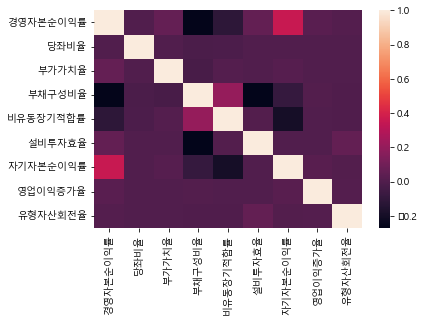

In [56]:
sns.heatmap(X.corr())

## under sampling 체크

In [57]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, stratify=y, random_state=46)
cc = RandomUnderSampler(random_state=42) #train만 언더샘플링 진행
X_train_under, y_train_under = cc.fit_resample(X_train, y_train)
print(X_train.shape)
print(X_train_under.shape)


(18782, 9)
(562, 9)


## 함수생성

In [58]:
#finance + text 임계점 default
def modeling(model):
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, stratify=y, random_state=46)
    cc = RandomUnderSampler(random_state=42) #train만 언더샘플링 진행
    X_train_under, y_train_under = cc.fit_resample(X_train, y_train)
    clf=model

    clf.fit(X_train_under, y_train_under)
    y_pred = clf.predict(X_test)
    y_true = y_test
    print(confusion_matrix(y_true, y_pred)) #confusion_matrix
    print('Recall score : ', recall_score(y_true, y_pred, average='macro')) # 스코어
    print('precision score : ', precision_score(y_true, y_pred, average='macro'))
    print('f1_score : ', f1_score(y_true, y_pred, average='macro'))
    print("roc_auc_score: {:.3f}".format(roc_auc_score(y_test, y_pred)))
    print("pr_auc_score: {:.3f}".format(average_precision_score(y_test, y_pred)))
    feat_importances = pd.Series(clf.feature_importances_ , index= X_train.columns)
    print(feat_importances.plot(kind = 'barh')) #feature_importances

In [13]:
#finance + text 임계점 조절 가능
def ft_modeling_thre(model, threshold):
    X_train, X_test, y_train, y_test = train_test_split(X_ft, y, test_size=0.3, stratify=y, random_state=46)
    cc = RandomUnderSampler(random_state=42) #train만 언더샘플링 진행
    X_train_under, y_train_under = cc.fit_resample(X_train, y_train)
    clf=model

    clf.fit(X_train_under, y_train_under)
    y_pred = clf.predict_proba(X_test)
    y_pred = (y_pred[:,1] > threshold) * 1 #임계점 조절
    y_true = y_test
    print(confusion_matrix(y_true, y_pred)) #confusion_matrix
    print('Recall score : ', recall_score(y_true, y_pred, average='macro')) # 스코어
    print('precision score : ', precision_score(y_true, y_pred, average='macro'))
    print('f1_score : ', f1_score(y_true, y_pred, average='macro'))
    print("roc_auc_score: {:.3f}".format(roc_auc_score(y_test, y_pred)))
    print("pr_auc_score: {:.3f}".format(average_precision_score(y_test, y_pred)))
    feat_importances = pd.Series(clf.feature_importances_ , index= X_train.columns)
    print(feat_importances.plot(kind = 'barh')) #feature_importances

In [14]:
#only finance feature 임계점 default
def finance_modeling(model):
    X_train, X_test, y_train, y_test = train_test_split(X_finance, y, test_size=0.3, stratify=y, random_state=46)
    cc = RandomUnderSampler(random_state=42) #train만 언더샘플링 진행
    X_train_under, y_train_under = cc.fit_resample(X_train, y_train)
    clf=model

    clf.fit(X_train_under, y_train_under)
    y_pred = clf.predict(X_test)
    y_true = y_test
    print(confusion_matrix(y_true, y_pred)) #confusion_matrix
    print('Recall score : ', recall_score(y_true, y_pred, average='macro')) # 스코어
    print('precision score : ', precision_score(y_true, y_pred, average='macro'))
    print('f1_score : ', f1_score(y_true, y_pred, average='macro'))
    print("roc_auc_score: {:.3f}".format(roc_auc_score(y_test, y_pred)))
    print("pr_auc_score: {:.3f}".format(average_precision_score(y_test, y_pred)))
    feat_importances = pd.Series(clf.feature_importances_ , index= X_train.columns)
    print(feat_importances.plot(kind = 'barh')) #feature_importances

In [15]:
#fonly finance 임계점 조절 가능
def finance_modeling_thre(model, threshold):
    X_train, X_test, y_train, y_test = train_test_split(X_finance, y, test_size=0.3, stratify=y, random_state=46)
    cc = RandomUnderSampler(random_state=42) #train만 언더샘플링 진행
    X_train_under, y_train_under = cc.fit_resample(X_train, y_train)
    clf=model

    clf.fit(X_train_under, y_train_under)
    y_pred = clf.predict_proba(X_test)
    y_pred = (y_pred[:,1] > threshold) * 1 #임계점 조절
    y_true = y_test
    print(confusion_matrix(y_true, y_pred)) #confusion_matrix
    print('Recall score : ', recall_score(y_true, y_pred, average='macro')) # 스코어
    print('precision score : ', precision_score(y_true, y_pred, average='macro'))
    print('f1_score : ', f1_score(y_true, y_pred, average='macro'))
    print("roc_auc_score: {:.3f}".format(roc_auc_score(y_test, y_pred)))
    print("pr_auc_score: {:.3f}".format(average_precision_score(y_test, y_pred)))
    feat_importances = pd.Series(clf.feature_importances_ , index= X_train.columns)
    print(feat_importances.plot(kind = 'barh')) #feature_importances

In [ ]:
"""
import matplotlib.pylab as plt
import matplotlib as mpl
mpl.rc('font', family='Malgun Gothic') #한글 폰트 설정
#precision, recall, thresholds = metrics.precision_recall_curve(y_test, model.decision_function(x_test)) #곡선 그리기
precision, recall, thresholds = metrics.precision_recall_curve(y_test, model.predict_proba(X_test)[:,0])
#score = metrics.average_precision_score(y_test, model.decision_function(X_test)) #AP(Average Precision)
score = metrics.average_precision_score(y_test, model.predict_proba(X_test)[:,0]) 
plt.plot(recall, precision, label='Precision (정밀도) - Recall (재현율) 곡선, AP(면적) = {:.3f}'.format(score))
plt.fill_between(recall, precision, step='post', alpha=0.2, color='b')
plt.xlabel("Recall (재현율)")
plt.ylabel("Precision (정밀도)")
plt.title('Precision (정밀도) - Recall (재현율) 곡선')
plt.legend(loc="best")
plt.show()
"""

In [ ]:
""""
import matplotlib.pylab as plt
import matplotlib as mpl
from sklearn import metrics
model=RandomForestClassifier()
model.fit(X_train, y_train)
mpl.rc('font', family='Malgun Gothic') #한글 폰트 설정
#precision, recall, thresholds = metrics.precision_recall_curve(y_test, clf.decision_function(X_test)) #곡선 그리기
precision, recall, thresholds = metrics.precision_recall_curve(y_test, model.predict_proba(X_test)[:,0])
plt.plot(thresholds, precision[:-1], "b--", label="정밀도")
plt.plot(thresholds, recall[:-1], "g-", label="재현율")
plt.xlabel("결정 임계값")
plt.ylabel("정밀도/재현율")
plt.title('결정 임계값에 대한 정밀도와 재현율')
plt.legend(loc="best")
plt.show()
"""

# modeling

col_1 = ['EBITDA단기차입비율', '경영자본순이익률','당좌비율', '매출채권회수기간', '부가가치율',
            '부채구성비율','비유동장기적합률',
            '설비투자효율','자기자본순이익률','매입채무회전률','순이익증가율']

[[6496 1433]
 [  25   96]]
Recall score :  0.8063297300734098
precision score :  0.5294761834507802
f1_score :  0.5077319911921988
roc_auc_score: 0.806
pr_auc_score: 0.053
AxesSubplot(0.125,0.125;0.775x0.755)


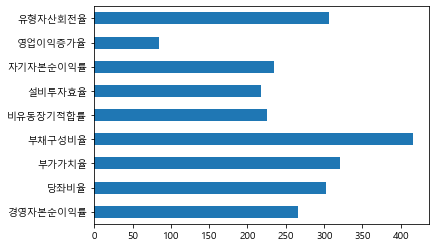

In [61]:
modeling(LGBMClassifier())

## new

In [ ]:
#col_1 = ['EBITDA단기차입비율', '경영자본순이익률','당좌비율', '매출채권회수기간', '부가가치율',
#            '부채구성비율','비유동장기적합률',
#            '설비투자효율','자기자본순이익률','재고자산보유기간']

[[6685 1244]
 [  20  101]]
Recall score :  0.8389091617860579
precision score :  0.5360550440912707
f1_score :  0.5257078537133711
roc_auc_score: 0.839
pr_auc_score: 0.065
AxesSubplot(0.125,0.125;0.775x0.755)


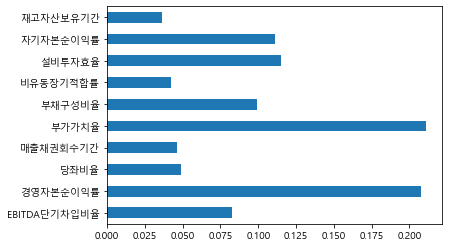

In [39]:
modeling(RandomForestClassifier())

[[6689 1240]
 [  27   94]]
Recall score :  0.8102357805690794
precision score :  0.5332222587336468
f1_score :  0.521347726667441
roc_auc_score: 0.810
pr_auc_score: 0.058
AxesSubplot(0.125,0.125;0.775x0.755)


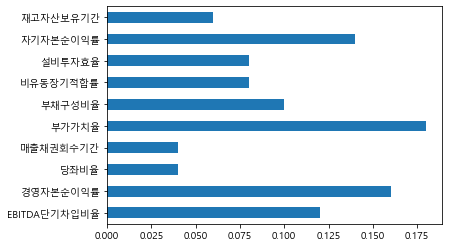

In [40]:
modeling(AdaBoostClassifier())

[[6649 1280]
 [  25   96]]
Recall score :  0.8159778572016732
precision score :  0.5330107811639754
f1_score :  0.5194456570471628
roc_auc_score: 0.816
pr_auc_score: 0.058
AxesSubplot(0.125,0.125;0.775x0.755)


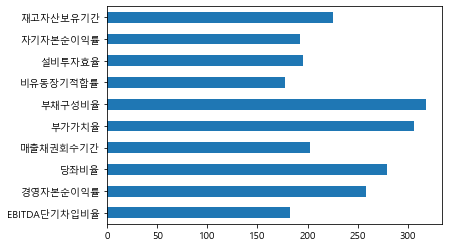

In [41]:
modeling(LGBMClassifier())

## 변수변경.csv
col= [ '설비투자효율', '총자본투자효율', '부채구성비율', '비유동장기적합률',<br>
       '재고자산보유기간', '매출채권회수기간', '매입채무회전률', '경영자본회전률', '경영자본순이익률', '자기자본순이익률',
        '자기자본증가율']

[[6796 1133]
 [  25   96]]
Recall score :  0.8252476264033379
precision score :  0.5372235673372174
f1_score :  0.5318568738229755
roc_auc_score: 0.825
pr_auc_score: 0.065
AxesSubplot(0.125,0.125;0.775x0.755)


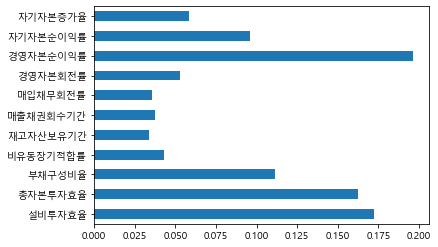

In [12]:
modeling(RandomForestClassifier())

Learning rate set to 0.008055
0:	learn: 0.6872420	total: 163ms	remaining: 2m 42s
1:	learn: 0.6810751	total: 166ms	remaining: 1m 22s
2:	learn: 0.6752322	total: 169ms	remaining: 56s
3:	learn: 0.6698571	total: 171ms	remaining: 42.6s
4:	learn: 0.6647385	total: 173ms	remaining: 34.5s
5:	learn: 0.6590275	total: 176ms	remaining: 29.1s
6:	learn: 0.6544099	total: 178ms	remaining: 25.2s
7:	learn: 0.6487908	total: 180ms	remaining: 22.4s
8:	learn: 0.6432125	total: 182ms	remaining: 20.1s
9:	learn: 0.6382161	total: 184ms	remaining: 18.3s
10:	learn: 0.6334111	total: 186ms	remaining: 16.8s
11:	learn: 0.6286877	total: 188ms	remaining: 15.5s
12:	learn: 0.6230864	total: 190ms	remaining: 14.5s
13:	learn: 0.6184787	total: 193ms	remaining: 13.6s
14:	learn: 0.6134119	total: 195ms	remaining: 12.8s
15:	learn: 0.6086760	total: 197ms	remaining: 12.1s
16:	learn: 0.6041932	total: 199ms	remaining: 11.5s
17:	learn: 0.5992069	total: 201ms	remaining: 11s
18:	learn: 0.5942039	total: 203ms	remaining: 10.5s
19:	learn: 0.

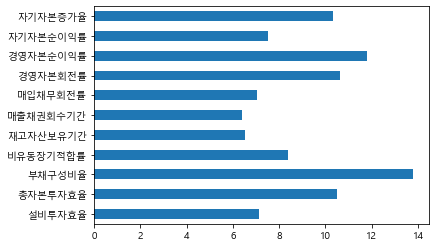

In [13]:
modeling(CatBoostClassifier())
#[[6832 1097]
# [  24   97]]

[[6598 1331]
 [  22   99]]
Recall score :  0.8251585090404614
precision score :  0.532953753195445
f1_score :  0.5173317461315613
roc_auc_score: 0.825
pr_auc_score: 0.059
AxesSubplot(0.125,0.125;0.775x0.755)


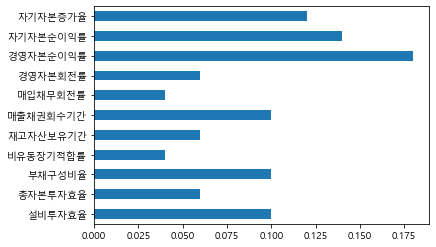

In [23]:
modeling(AdaBoostClassifier())

In [32]:
from sklearn.neural_network import MLPClassifier
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, stratify=y, random_state=46)
cc = RandomUnderSampler(random_state=42) #train만 언더샘플링 진행
X_train_under, y_train_under = cc.fit_resample(X_train, y_train)


clf = MLPClassifier().fit(X_train, y_train)
y_pred = clf.predict(X_test)
y_true = y_test
print(confusion_matrix(y_true, y_pred)) #confusion_matrix
print('Recall score : ', recall_score(y_true, y_pred, average='macro')) # 스코어
print('precision score : ', precision_score(y_true, y_pred, average='macro'))
print('f1_score : ', f1_score(y_true, y_pred, average='macro'))
print("roc_auc_score: {:.3f}".format(roc_auc_score(y_test, y_pred)))
print("pr_auc_score: {:.3f}".format(average_precision_score(y_test, y_pred)))

[[7850   79]
 [ 107   14]]
Recall score :  0.5528695269692071
precision score :  0.5685451776416518
f1_score :  0.5595663494924703
roc_auc_score: 0.553
pr_auc_score: 0.031


[[6799 1130]
 [  24   97]]
Recall score :  0.8295690367715958
precision score :  0.5377685452185373
f1_score :  0.5328451164093024
roc_auc_score: 0.830
pr_auc_score: 0.066
AxesSubplot(0.125,0.125;0.775x0.755)


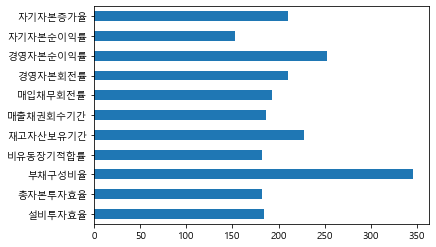

In [22]:
modeling(LGBMClassifier())

### RF

[[6728 1201]
 [  19  102]]
Recall score :  0.8457529583316395
precision score :  0.5377324119266902
f1_score :  0.5300647545024973
roc_auc_score: 0.846
pr_auc_score: 0.068
AxesSubplot(0.125,0.125;0.775x0.755)


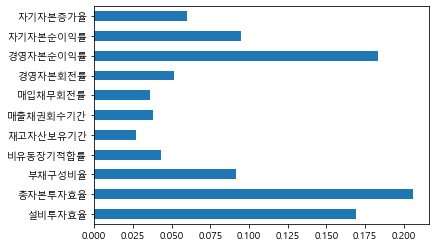

In [11]:
modeling(RandomForestClassifier())

[[6421  996]
 [  15  106]]
Recall score :  0.8708734791750468
precision score :  0.5469290537911182
f1_score :  0.5501818268315385
roc_auc_score: 0.871
pr_auc_score: 0.086
AxesSubplot(0.125,0.125;0.775x0.755)


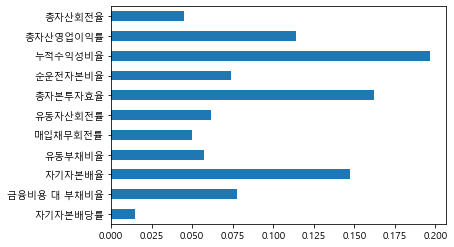

In [17]:
finance_modeling(RandomForestClassifier())

[[6708  709]
 [  13  108]]
Recall score :  0.8984853870436132
precision score :  0.5651283532478355
f1_score :  0.5896045709652734
roc_auc_score: 0.898
pr_auc_score: 0.120
AxesSubplot(0.125,0.125;0.775x0.755)


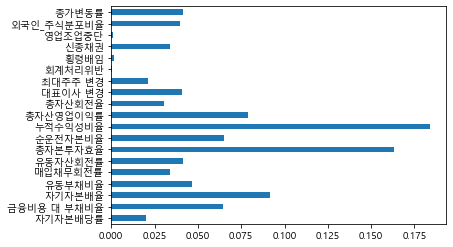

In [16]:
ft_modeling(RandomForestClassifier())

[[5014 1805]
 [   7  110]]
Recall score :  0.8377346855129522
precision score :  0.5280235543354985
f1_score :  0.4776135879974463
roc_auc_score: 0.838
pr_auc_score: 0.055
AxesSubplot(0.125,0.125;0.775x0.755)


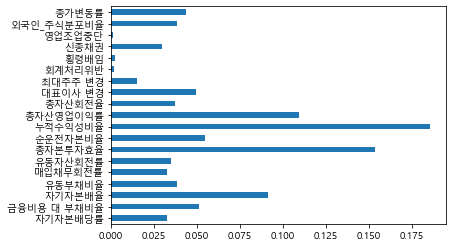

In [184]:
ft_modeling_thre(RandomForestClassifier(), 0.3)

[[4794 2025]
 [  11  106]]
Recall score :  0.8045092708533096
precision score :  0.5237263116054517
f1_score :  0.4595755988958909
roc_auc_score: 0.805
pr_auc_score: 0.047
AxesSubplot(0.125,0.125;0.775x0.755)


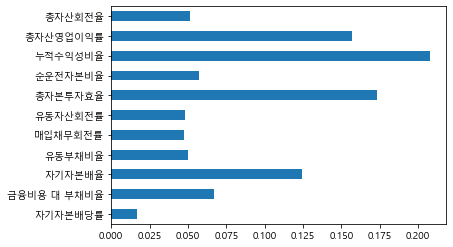

In [156]:
finance_modeling_thre(RandomForestClassifier(), 0.3)

### catboost

Learning rate set to 0.007969
0:	learn: 0.6870686	total: 2.34ms	remaining: 2.34s
1:	learn: 0.6806459	total: 4.4ms	remaining: 2.2s
2:	learn: 0.6744650	total: 6.39ms	remaining: 2.12s
3:	learn: 0.6676362	total: 8.37ms	remaining: 2.08s
4:	learn: 0.6616069	total: 10.2ms	remaining: 2.02s
5:	learn: 0.6556165	total: 12.8ms	remaining: 2.12s
6:	learn: 0.6499891	total: 15.3ms	remaining: 2.16s
7:	learn: 0.6436980	total: 17.6ms	remaining: 2.19s
8:	learn: 0.6375104	total: 19.6ms	remaining: 2.16s
9:	learn: 0.6310602	total: 21.4ms	remaining: 2.12s
10:	learn: 0.6261075	total: 23.1ms	remaining: 2.08s
11:	learn: 0.6200616	total: 25ms	remaining: 2.06s
12:	learn: 0.6141704	total: 27.6ms	remaining: 2.09s
13:	learn: 0.6082563	total: 29.9ms	remaining: 2.1s
14:	learn: 0.6028464	total: 32ms	remaining: 2.1s
15:	learn: 0.5972863	total: 34.2ms	remaining: 2.1s
16:	learn: 0.5920311	total: 36.5ms	remaining: 2.11s
17:	learn: 0.5876749	total: 38.6ms	remaining: 2.1s
18:	learn: 0.5823841	total: 40.8ms	remaining: 2.1s
19:

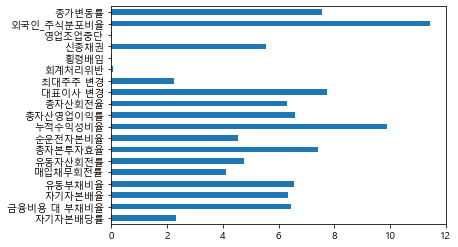

In [157]:
ft_modeling(CatBoostClassifier())
#[6166  653]
#[  15  102]

Learning rate set to 0.007969
0:	learn: 0.6862163	total: 2.29ms	remaining: 2.28s
1:	learn: 0.6797235	total: 4.25ms	remaining: 2.12s
2:	learn: 0.6740381	total: 6.17ms	remaining: 2.05s
3:	learn: 0.6677571	total: 8.12ms	remaining: 2.02s
4:	learn: 0.6618136	total: 10.9ms	remaining: 2.17s
5:	learn: 0.6560460	total: 12.8ms	remaining: 2.12s
6:	learn: 0.6507303	total: 14.7ms	remaining: 2.08s
7:	learn: 0.6449050	total: 16.7ms	remaining: 2.07s
8:	learn: 0.6394249	total: 18.7ms	remaining: 2.06s
9:	learn: 0.6335849	total: 20.6ms	remaining: 2.04s
10:	learn: 0.6282009	total: 22.7ms	remaining: 2.04s
11:	learn: 0.6230257	total: 32.5ms	remaining: 2.67s
12:	learn: 0.6178521	total: 34.4ms	remaining: 2.61s
13:	learn: 0.6128740	total: 36.3ms	remaining: 2.55s
14:	learn: 0.6081361	total: 38.4ms	remaining: 2.52s
15:	learn: 0.6034701	total: 41.2ms	remaining: 2.53s
16:	learn: 0.5990319	total: 43.3ms	remaining: 2.5s
17:	learn: 0.5944550	total: 45.3ms	remaining: 2.47s
18:	learn: 0.5894173	total: 47.4ms	remaining:

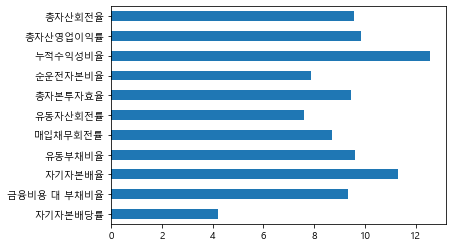

In [159]:
finance_modeling(CatBoostClassifier())
#[[5725 1094]
#[  19   98]]

### Adaboost

[[5850  969]
 [  13  104]]
Recall score :  0.8733929706213033
precision score :  0.5473536079086962
f1_score :  0.5486786671773267
roc_auc_score: 0.873
pr_auc_score: 0.088
AxesSubplot(0.125,0.125;0.775x0.755)


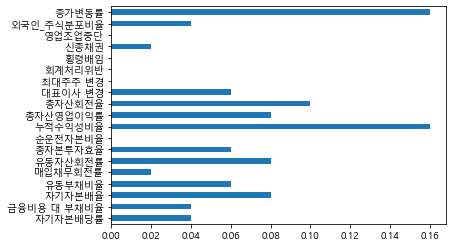

In [160]:
ft_modeling(AdaBoostClassifier())

[[ 106 6713]
 [   0  117]]
Recall score :  0.5077724006452559
precision score :  0.5085651537335285
f1_score :  0.0321486614225604
roc_auc_score: 0.508
pr_auc_score: 0.017
AxesSubplot(0.125,0.125;0.775x0.755)


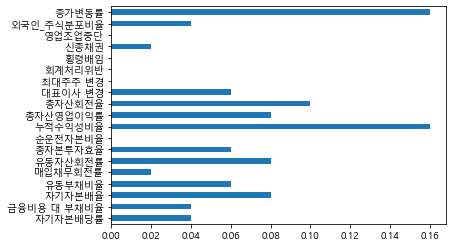

In [164]:
#임계값 조절 안한게 더 성능 좋음 
ft_modeling_thre(AdaBoostClassifier(), 0.3)

[[5568 1251]
 [  20   97]]
Recall score :  0.8228009220090171
precision score :  0.5341896794530033
f1_score :  0.5149905192241195
roc_auc_score: 0.823
pr_auc_score: 0.063
AxesSubplot(0.125,0.125;0.775x0.755)


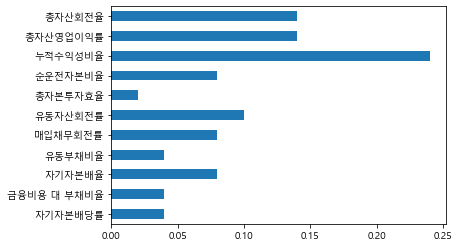

In [166]:
finance_modeling(AdaBoostClassifier())

[[   0 6819]
 [   0  117]]
Recall score :  0.5
precision score :  0.008434256055363323
f1_score :  0.016588685665674185
roc_auc_score: 0.500
pr_auc_score: 0.017
AxesSubplot(0.125,0.125;0.775x0.755)


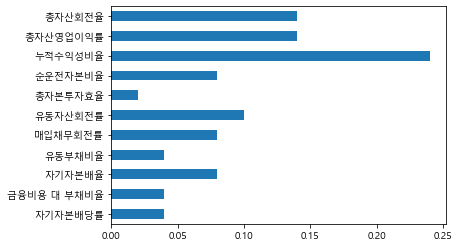

In [165]:
finance_modeling_thre(AdaBoostClassifier(), 0.3)

### LGBM

[[6060  759]
 [  11  106]]
Recall score :  0.8973381313900451
precision score :  0.5603657299984861
f1_score :  0.5780748587057334
roc_auc_score: 0.897
pr_auc_score: 0.113
AxesSubplot(0.125,0.125;0.775x0.755)


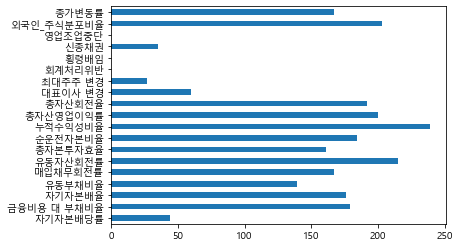

In [167]:
ft_modeling(LGBMClassifier())

[[4215 2604]
 [   4  113]]
Recall score :  0.7919688953564888
precision score :  0.5203209484967447
f1_score :  0.4217356273439429
roc_auc_score: 0.792
pr_auc_score: 0.041
AxesSubplot(0.125,0.125;0.775x0.755)


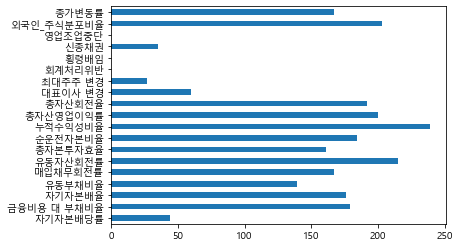

In [168]:
ft_modeling_thre(LGBMClassifier(), 0.025)

[[5703 1116]
 [  20   97]]
Recall score :  0.83269973415156
precision score :  0.5382361766401867
f1_score :  0.5276444979455496
roc_auc_score: 0.833
pr_auc_score: 0.069
AxesSubplot(0.125,0.125;0.775x0.755)


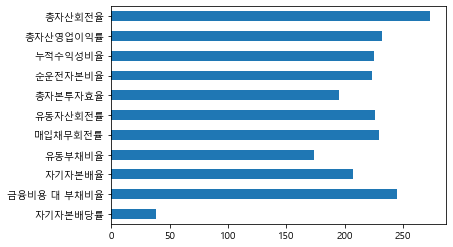

In [169]:
finance_modeling(LGBMClassifier())

# 할일
1. 임계값 대입
2. 각자 만든 파일 합치기 - def 생성
3. cat 해보기
4. ROC/ PR AUC